In [2]:
!pip install earthpy
import matplotlib.pyplot as plt

import numpy as np
import earthpy.plot as ep
import seaborn as sns
import earthpy.spatial as es

import plotly.graph_objects as go
import plotly.express as px

from scipy.io import loadmat

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,
                             confusion_matrix, classification_report)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tqdm import tqdm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 3.2 MB/s eta 0:00:00


In [3]:
data = loadmat('/content/PaviaU.mat')['paviaU']

gt = loadmat('/content/PaviaU_gt.mat')['paviaU_gt']

df = pd.DataFrame(data.reshape(data.shape[0]*data.shape[1], -1))

df.columns = [f'band{i}' for i in range(1, df.shape[-1]+1)]

df['class'] = gt.ravel()

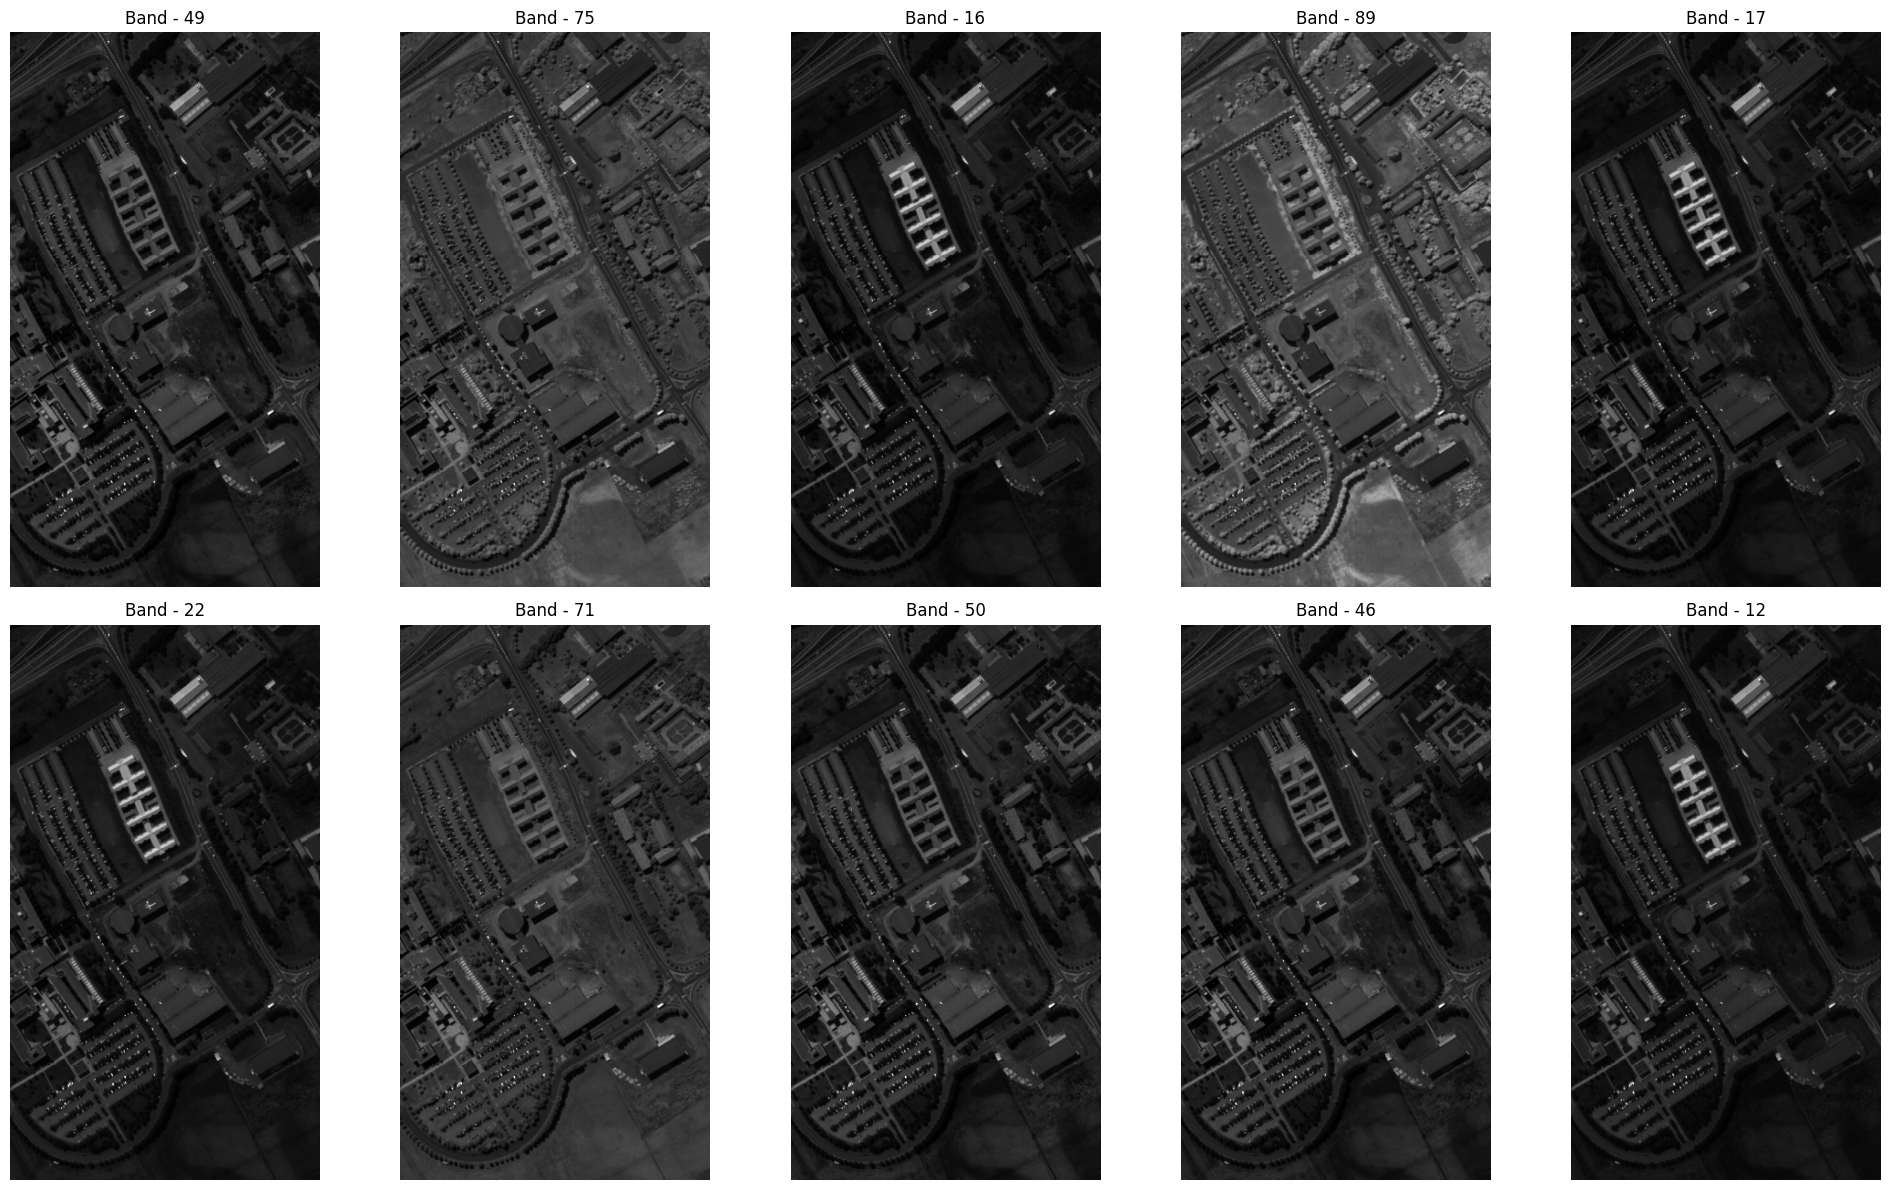

In [4]:
fig = plt.figure(figsize = (20, 12))

ax = fig.subplots(2, 5)

for i in range(2):
  for j in range(5):
    c = np.random.randint(103)
    ax[i][j].imshow(data[:, :, c], cmap='gray')
    ax[i][j].axis('off')
    ax[i][j].title.set_text(f"Band - {c}")
    c+=1

plt.tight_layout()

plt.show()

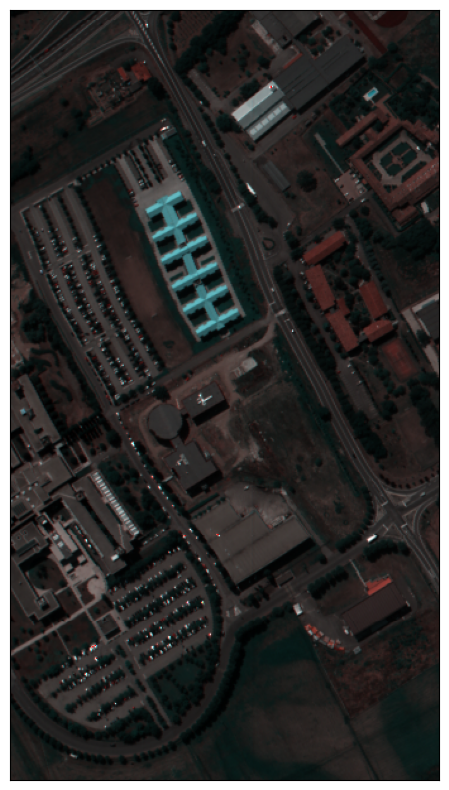

In [5]:
mdata = np.moveaxis(data, -1, 0)

ep.plot_rgb(mdata, (60, 30, 27), figsize=(12, 10))

plt.show()

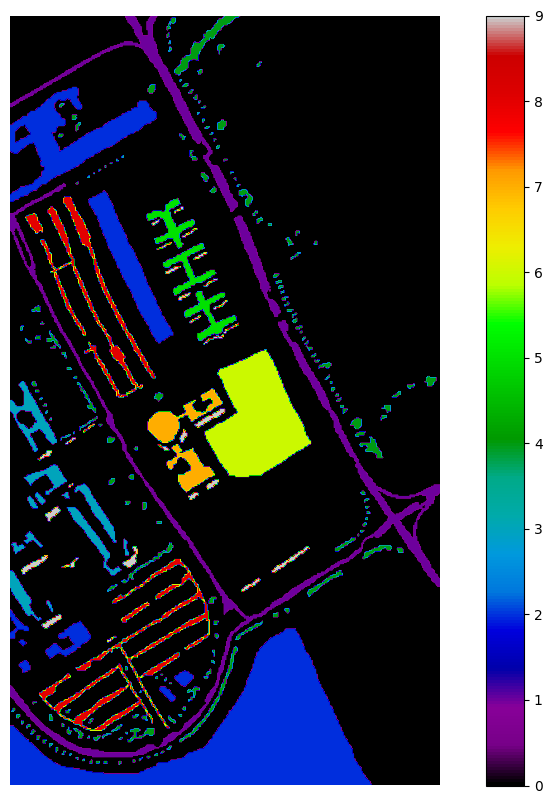

In [6]:
def plot_data(data):
  fig = plt.figure(figsize=(12, 10))
  plt.imshow(data, cmap='nipy_spectral')
  plt.colorbar()
  plt.axis('off')
  plt.show()

plot_data(gt)

In [7]:
X = df[df['class']!=0].iloc[:, :-1].values

y = tf.keras.utils.to_categorical(df[df['class']!=0].iloc[:, -1].values ,
                                  num_classes= np.unique(gt).shape[0],
                                  dtype='float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y)

print(f"Train Data: {X_train.shape}\nTest Data: {X_test.shape}")

Train Data: (29943, 103)
Test Data: (12833, 103)


In [8]:
model = Sequential(name='Pavia_University')

model.add(Input(shape = X_train[0].shape, name = 'Input_Layer'))

model.add(BatchNormalization(name = 'BatchNormalization'))

model.add(Dense(units = 128, activation= 'relu', name = 'Layer1'))
model.add(Dense(units = 128, activation= 'relu', name = 'Layer2'))
model.add(Dense(units = 128, activation= 'relu', name = 'Layer3'))
model.add(Dense(units = 128, activation= 'relu', name = 'Layer4'))

model.add(Dropout(rate = 0.2, name = 'Dropout1',))

model.add(Dense(units = 64, activation= 'relu', name = 'Layer5'))
model.add(Dense(units = 64, activation= 'relu', name = 'Layer6'))
model.add(Dense(units = 64, activation= 'relu', name = 'Layer7'))
model.add(Dense(units = 64, activation= 'relu', name = 'Layer8'))

model.add(Dropout(rate = 0.2, name = 'Dropout2'))

model.add(Dense(units = 32, activation= 'relu', name = 'Layer9'))
model.add(Dense(units = 32, activation= 'relu', name = 'Layer10'))
model.add(Dense(units = 32, activation= 'relu', name = 'Layer11'))
model.add(Dense(units = 32, activation= 'relu', name = 'Layer12'))

model.add(Dense(units = y_train.shape[1], activation= 'softmax', name = 'Output_Layer'))

model.summary()

Model: "Pavia_University"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 BatchNormalization (BatchNo  (None, 103)              412       
 rmalization)                                                    
                                                                 
 Layer1 (Dense)              (None, 128)               13312     
                                                                 
 Layer2 (Dense)              (None, 128)               16512     
                                                                 
 Layer3 (Dense)              (None, 128)               16512     
                                                                 
 Layer4 (Dense)              (None, 128)               16512     
                                                                 
 Dropout1 (Dropout)          (None, 128)               0         
                                                  

In [9]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Callbacks
es = EarlyStopping(monitor = 'val_loss',
                   min_delta = 0,
                   patience = 15,
                   verbose = 1,
                   restore_best_weights = True)

checkpoint = ModelCheckpoint(filepath = 'Pavia_University_Model.h5',
                             monitor = 'val_loss',
                             mode ='min',
                             save_best_only = True,
                             verbose = 1)
# Fit
history = model.fit(x = X_train,
          y = y_train,
          validation_data = (X_test, y_test),
          epochs = 100,
          callbacks = [es, checkpoint])

Epoch 1/100
930/936 [============================>.] - ETA: 0s - loss: 0.8242 - accuracy: 0.6987
Epoch 1: val_loss improved from inf to 0.47837, saving model to Pavia_University_Model.h5
936/936 [==============================] - 10s 6ms/step - loss: 0.8227 - accuracy: 0.6992 - val_loss: 0.4784 - val_accuracy: 0.8033
Epoch 2/100
930/936 [============================>.] - ETA: 0s - loss: 0.5792 - accuracy: 0.7805
Epoch 2: val_loss improved from 0.47837 to 0.42879, saving model to Pavia_University_Model.h5
936/936 [==============================] - 6s 7ms/step - loss: 0.5790 - accuracy: 0.7805 - val_loss: 0.4288 - val_accuracy: 0.8190
Epoch 3/100
935/936 [============================>.] - ETA: 0s - loss: 0.5149 - accuracy: 0.8075
Epoch 3: val_loss improved from 0.42879 to 0.36662, saving model to Pavia_University_Model.h5
936/936 [==============================] - 5s 5ms/step - loss: 0.5148 - accuracy: 0.8076 - val_loss: 0.3666 - val_accuracy: 0.8538
Epoch 4/100
935/936 [================

In [10]:
hist = pd.DataFrame(data= history.history)

fig = go.Figure()

fig.add_trace(go.Scatter(x = hist.index, y = hist.loss.values,
                    mode='lines+markers',
                    name='Train Loss'))

fig.add_trace(go.Scatter(x = hist.index, y = hist.accuracy.values,
                    mode='lines+markers',
                    name='Train Accuracy'))

fig.add_trace(go.Scatter(x = hist.index, y = hist.val_loss.values,
                    mode='lines+markers', name='Test loss'))

fig.add_trace(go.Scatter(x = hist.index, y = hist.val_accuracy.values,
                    mode='lines+markers', name='Test Accuracy'))

fig.show()

In [11]:
pred = np.argmax(model.predict(X_test), axis=1)

# Classification Report
print(classification_report(pred, np.argmax(y_test, 1),
      target_names = ['1. Asphalt', '2. Meadows', '3. Gravel', '4. Trees',
                 '5. Painted metal sheets','6. Bare Soil', '7. Bitumen',
                 '8. Self-Blocking Bricks', '9. Shadows']))

402/402 [==============================] - 1s 3ms/step
                         precision    recall  f1-score   support

             1. Asphalt       0.94      0.97      0.95      1930
             2. Meadows       0.99      0.98      0.98      5648
              3. Gravel       0.58      0.92      0.71       396
               4. Trees       0.98      0.94      0.96       956
5. Painted metal sheets       1.00      1.00      1.00       403
           6. Bare Soil       0.93      0.97      0.95      1438
             7. Bitumen       0.85      0.89      0.87       382
8. Self-Blocking Bricks       0.96      0.76      0.85      1395
             9. Shadows       1.00      1.00      1.00       285

               accuracy                           0.94     12833
              macro avg       0.91      0.94      0.92     12833
           weighted avg       0.95      0.94      0.95     12833



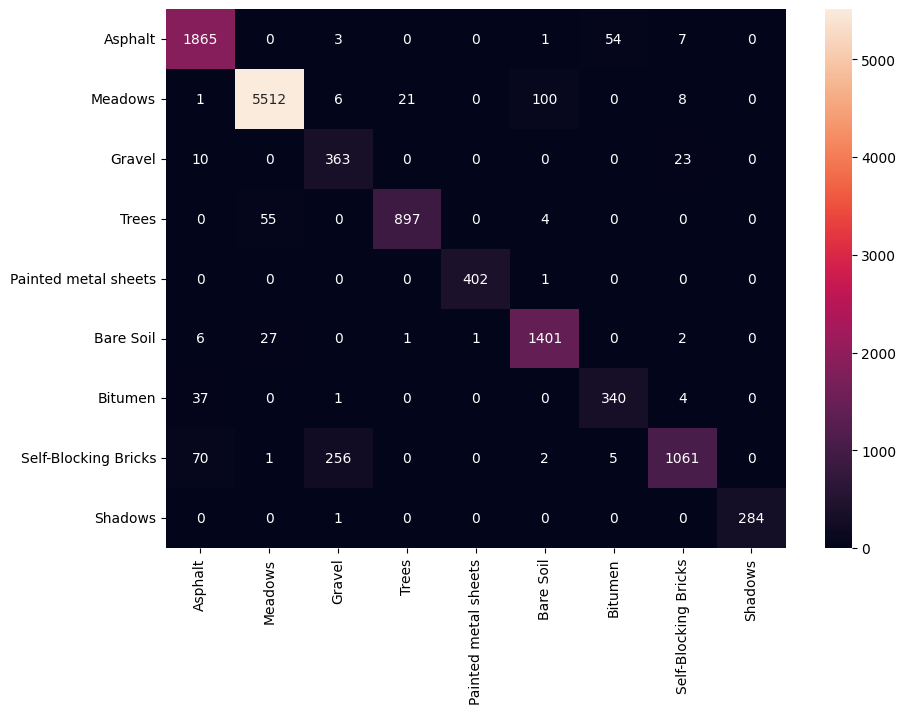

In [12]:
plt.figure(figsize = (10,7))

classes = ['Asphalt', 'Meadows', 'Gravel', 'Trees', 'Painted metal sheets',
            'Bare Soil', 'Bitumen', 'Self-Blocking Bricks', 'Shadows']

mat = confusion_matrix(np.add(pred, 1), np.add(np.argmax(y_test, 1), 1))

df_cm = pd.DataFrame(mat, index = classes, columns = classes)

sns.heatmap(df_cm, annot=True, fmt='d')

plt.show()